In [1]:
from kmeans import kmeans as my_KMeans
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 

In [2]:
#Let's get this data
df = pd.read_csv("../datasets/historical-weather.csv")
df.head(3)

rowID     hpwren_timestamp  air_pressure  air_temp  avg_wind_direction  \
0      0  2011-09-10 00:00:49         912.3     64.76                97.0   
1    100  2011-09-10 01:40:49         911.8     62.96                95.0   
2    200  2011-09-10 03:20:49         911.4     68.00                53.0   

   avg_wind_speed  max_wind_direction  max_wind_speed  min_wind_direction  \
0             1.2               106.0             1.6                85.0   
1             2.3               106.0             2.5                88.0   
2             0.3                69.0             0.5                19.0   

   min_wind_speed  rain_accumulation  rain_duration  relative_humidity  
0             1.0                NaN            NaN               60.5  
1             1.9                0.0            0.0               63.9  
2             0.2                0.0            0.0               33.4

In [3]:
df.head(3)

rowID     hpwren_timestamp  air_pressure  air_temp  avg_wind_direction  \
0      0  2011-09-10 00:00:49         912.3     64.76                97.0   
1    100  2011-09-10 01:40:49         911.8     62.96                95.0   
2    200  2011-09-10 03:20:49         911.4     68.00                53.0   

   avg_wind_speed  max_wind_direction  max_wind_speed  min_wind_direction  \
0             1.2               106.0             1.6                85.0   
1             2.3               106.0             2.5                88.0   
2             0.3                69.0             0.5                19.0   

   min_wind_speed  rain_accumulation  rain_duration  relative_humidity  
0             1.0                NaN            NaN               60.5  
1             1.9                0.0            0.0               63.9  
2             0.2                0.0            0.0               33.4

In [4]:
df.drop(['rowID', 'hpwren_timestamp'], axis=1, inplace=True)

In [5]:
for x in df:
    df[x].fillna(df[x].median(), inplace=True)



In [6]:
#Let's scale this data
scaler = StandardScaler() 
df_scaled = pd.DataFrame(scaler.fit_transform(df))

In [7]:
#Let's reduce the dimensions with PCA
pca = PCA(n_components = 2) 
df_pca = pca.fit_transform(df_scaled) 
df_pca = pd.DataFrame(df_pca) 
df_pca.columns = ['P1', 'P2'] 

In [8]:
start = time.time()

k = KMeans(n_clusters=8, tol=0, max_iter=100)
output = k.fit(df_pca)

end = time.time()

elapsed = end - start
elapsed

0.5217578411102295

In [9]:
print(k.labels_)

[0 5 3 ... 4 3 4]


In [10]:
my_start = time.time()

my_k = my_KMeans(k=8)
my_output = my_k.fit(np.array(df_pca))

my_end = time.time()

my_elapsed = my_end - my_start
my_elapsed

41.97644805908203

In [11]:
ratio = my_elapsed / elapsed

print("My algorithm is {} times slower than the built in one :P".format(np.round(ratio, decimals=2)))

My algorithm is 80.45 times slower than the built in one :P


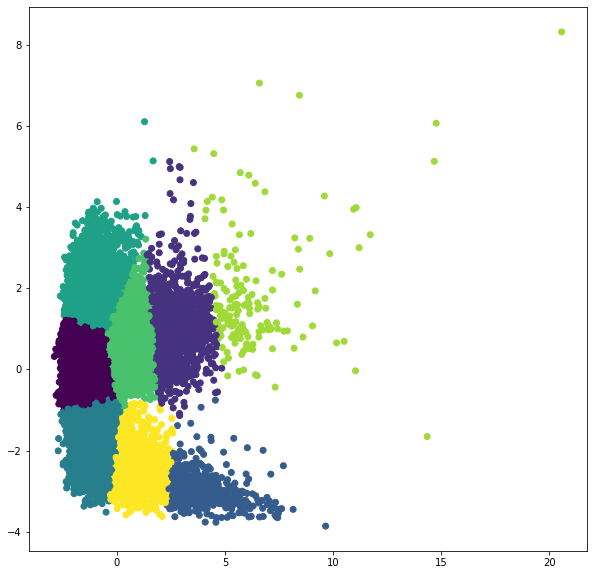

In [12]:
#Here's the clustering done by the buikt in KMeans.
plt.figure(figsize=(10,10))
plt.scatter(df_pca['P1'], df_pca['P2'], c=k.labels_)

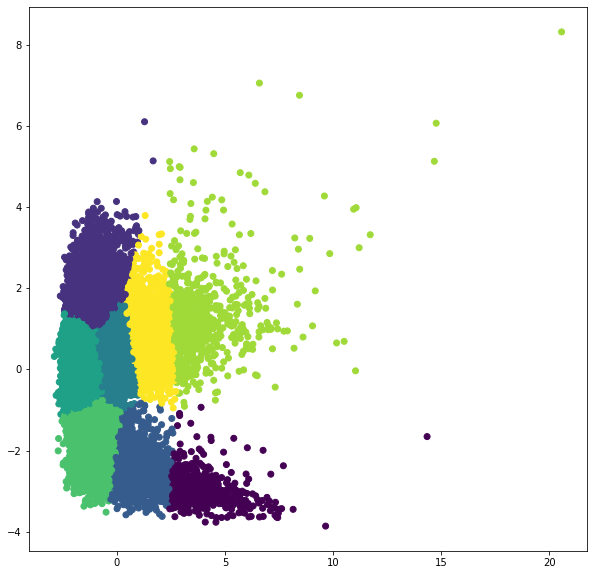

In [13]:
#Here's the clustering done by my kmeans.
plt.figure(figsize=(10,10))
plt.scatter(my_output[2][:,0], my_output[2][:,1], c=my_output[0])



## The slight difference in clustering might be due to the distance method used or any further processing of the datapoints that I did not include in my implementation of KMeans.

# I'd say I did a pretty good job at implementing KMeans. I know it is very slow but I put so much work into this. David also mentioned that it's normal that our implementation will be significantly slower.

# My output seems consistent with the built in KMeans.